Link Dashboard :
https://lookerstudio.google.com/u/0/reporting/44ddad68-5f37-425f-91d8-c9099da6705b/page/ly4UD/edit

Link Dataset : https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset

# **Identifikasi Masalah**

Latar Belakang :  
Perusahaan A ingin mengeluarkan produk obat tidur. Agar strategi pemasarannya tepat sasaran, tim survey melakukan random sampling ke 374 orang di Kota Z yang kemudian akan di olah datanya oleh tim DS. 

Problem Statement :     
Menganalisis korelasi dari kebiasaan pola hidup dari 374 sampel warga di Kota Z.

**Poin Penjabaran** :    
1. Demografi responden seperti apa?
2. Pekerjaan apa yang memiliki kualitas tidur terburuk?
3. Apakah kualitas tidur mempengaruhi stress level ?
4. Apakah tingkat aktifitas fisik dan langkah harian mempengaruhi kualitas tidur?
5. Apakah BMI mempengaruhi tekanan darah?
6. Bagaimana hubungan antara tekanan darah dengan stress level?
7. Apakah usia mempengaruhi kualitas tidur ?
8. Bagaimana central tendencies dari durasi tidur berdasarkan pekerjaan?
9. Apakah orang yang dengan sleep disorder dan yang tanpa disorder memiliki stress level yang sama ?


# Import Library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# **Data Loading**

Data yang digunakan berumber dari Kaggle : `https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset` 

In [2]:
#melakukan dataframe loading 
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

In [3]:
#menampilkan 5 data teratas
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


Adapun deskripsi pada kolom adalah :                                         
Person ID: Identifikasi nomor sampel                                                                 
Gender: Jenis Kelamin                                                      
Age: Usia dalam Tahun                                
Occupation: Pekerjaan                                           
Sleep Duration : Durasi tidur per hari berdasarkan jam                                    
Quality of Sleep : rating kualitas tidur dari angka 1-10 secara subjektif                                              
Physical Activity Level (minutes/day): tingkat aktifitas fisik berdasakan menit per hari                               
Stress Level (scale: 1-10): rating tingkat stress dari angka 1-10 secara subjektif                                            
BMI Category: Kategori BMI sampel                                                     
Blood Pressure : Ukuran tekanan darah berdasarkan sistolik/diastolik                               
Heart Rate : detak jantung sampel dalam detak per menit (bpm)                               
Daily Steps: jumlah langkah per hari                                                             
Sleep Disorder: Penyakit tidur yang dimiliki seseorang 

# **Data Cleaning & Preprocessing**

In [4]:
#melihat missing value
df.isna().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

Missing value pada sleep disorder menandakan bahwa sampel tidak memiliki sleep disorder, sehingga value akan diubah menjadi 'None'

In [5]:
#mengubah missing value
df = df.fillna('None')

In [6]:
#mengubah nama kolom supaya mudah dilakukan pemrosesan data
df = df.rename(columns = {'Person ID':'ID','Sleep Duration':'sleep_duration','Quality of Sleep':'sleep_quality','Physical Activity Level':'activity_level','Stress Level':'stress_level','BMI Category':'BMI','Blood Pressure':'blood_pressure','Heart Rate':'heart_rate','Daily Steps':'steps','Sleep Disorder':'sleep_disorder'})

Pada kolom Blood Pressure, saya ingin memisahkan berdasarkan Sistolik dan Diastoliknya, sehingga nanti dapat ditentukan kategori tekanan darah pada sampel. Data sistolik diambil dari sebelah kiri dari nilai tekanan darah berupa angka ratusan, sedangkan diastolik diambil dari sebelah kanan dari nilai tekanan darah berupa angka puluhan

In [7]:
#membuat kolom baru sistolik
sistolik = []

for i in df['blood_pressure'].str.split('/'):
    sistolik.append(i[0])

df['sistolik'] = sistolik

#mengubah tipe data sistolik menjadi integer
df['sistolik'] = df['sistolik'].astype(int)

In [8]:
#membuat kolom baru diastolik
diastolik = []

for i in df['blood_pressure'].str.split('/'):
    diastolik.append(i[1])

df['diastolik'] = diastolik

#mengubah tipe data diastolik menjadi integer
df['diastolik'] = df['diastolik'].astype(int)

In [9]:
#menambahkan kolom baru kategori tekanan darah
bp_category = []

for i in range(len(df)):

    if df['sistolik'][i] > 120 and df['diastolik'][i] > 80:
        hasil1 = 'Hipertensi'
        bp_category.append(hasil1)
    elif df['sistolik'][i] < 90 and df['diastolik'][i] < 60:
        hasil2 = 'Hipotensi'
        bp_category.append(hasil2)
    else:
        hasil3 = 'Normal'
        bp_category.append(hasil3)

df['bp_category'] = bp_category

In [10]:
#melihat berapa range kolom heart rate
print(df['heart_rate'].min())
print(df['heart_rate'].max())

65
86


berdasarkan data, range kolom heart rate berkisar antara 65-86 bps, dimana heart rate tersebut masih di ambang normal. sehingga kolom heart rate tidak akan digunakan sebagai indikator penilaian. kolom heart rate akan dihapus bersama kolom lain yang tidak digunakan

In [11]:
#menghilangkan kolom yang tidak digunakan
df = df.drop(['blood_pressure', 'heart_rate'], axis=1)

In [12]:
df.head()

,ID,Gender,Age,Occupation,sleep_duration,sleep_quality,activity_level,stress_level,BMI,steps,sleep_disorder,sistolik,diastolik,bp_category
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,4200,None,126,83,Hipertensi
1,2,Male,28,Doctor,6.2,6,60,8,Normal,10000,None,125,80,Normal
2,3,Male,28,Doctor,6.2,6,60,8,Normal,10000,None,125,80,Normal
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,3000,Sleep Apnea,140,90,Hipertensi
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,3000,Sleep Apnea,140,90,Hipertensi


In [13]:
#mengunduh data yang sudah bersih
df.to_csv('sleep_and_lifestyle.csv', index=False)

# **Data Exploration**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Nurse'),
  Text(1, 0, 'Doctor'),
  Text(2, 0, 'Engineer'),
  Text(3, 0, 'Lawyer'),
  Text(4, 0, 'Teacher'),
  Text(5, 0, 'Accountant'),
  Text(6, 0, 'Salesperson'),
  Text(7, 0, 'Software Engineer'),
  Text(8, 0, 'Scientist'),
  Text(9, 0, 'Sales Representative'),
  Text(10, 0, 'Manager')])

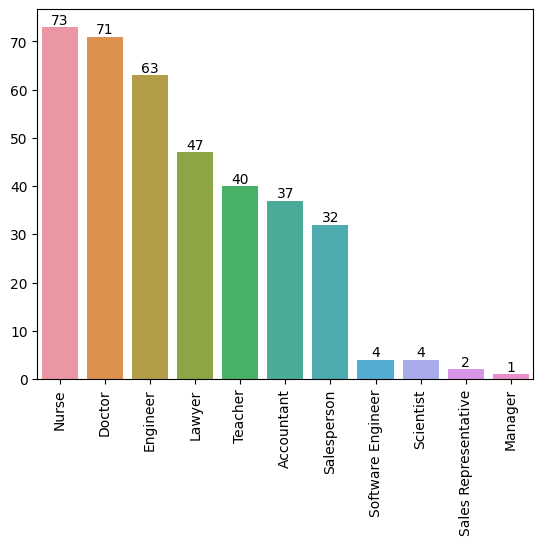

In [14]:
#melihat sampel berdasarkan pekerjaan
o = sns.barplot(x=df['Occupation'].value_counts().index,
            y=df['Occupation'].value_counts().values)

plt.bar_label(o.containers[0])
plt.xticks(rotation = 90)

Terdapat 11 jenis pekerjaan pada data ini. Sampel terbanyak yaitu bekerja sebagai 'Nurse' dengan jumlah 74 orang dan sampel terrendah bekerja sebagai 'Manager' dengan jumlah 1 orang.

In [15]:
#melihat unique value BMI
df['BMI'].value_counts()

Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: BMI, dtype: int64

Terdapat nilai serupa pada BMI yaiut `Normal Weight` dan `Normal`, sehingga akan dilakukan merge/replace menjadi satu.

In [16]:
#rename BMI
df['BMI'].replace({'Normal Weight':'Normal'}, inplace = True)

[Text(0, 0, '216'), Text(0, 0, '148'), Text(0, 0, '10')]

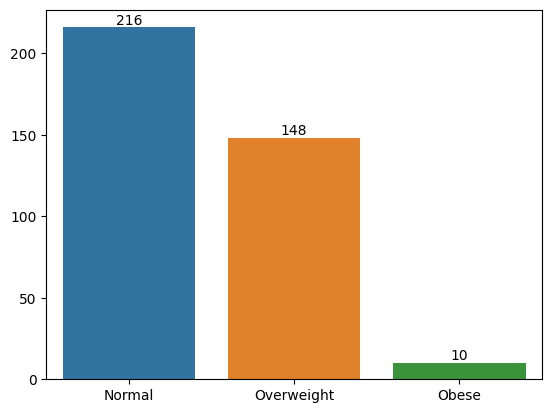

In [17]:
#melihat sampel berdasarkan BMI
b = sns.barplot(x=df['BMI'].value_counts().index,
            y=df['BMI'].value_counts().values)

plt.bar_label(b.containers[0])

Berdasarkan grafik, terdaoat 3 jenis BMI yaitu `Normal, Overweight, dan Obese`. mayoritas kelompok memiliki BMI Normal dengan jumlah 216 orang, kemudian pada kelompok `Overweight` sebanyak 148 orang dan kelompok paling sedikit yaitu `Obese` sebanyak 10 orang.

[Text(0, 0, '219'), Text(0, 0, '78'), Text(0, 0, '77')]

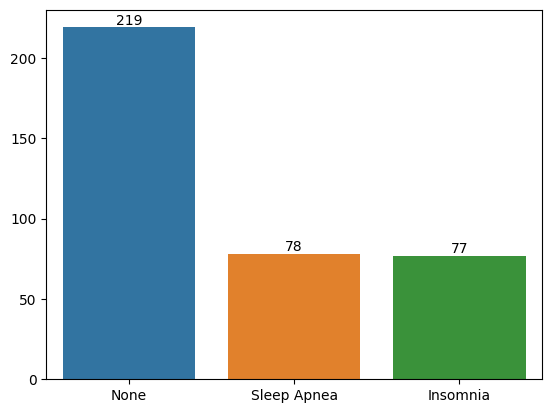

In [18]:
#melihat sampel berdasarkan Sleep Disorder
sd = sns.barplot(x=df['sleep_disorder'].value_counts().index,
            y=df['sleep_disorder'].value_counts().values)

plt.bar_label(sd.containers[0])

Beberapa sampel memiliki sleep disorder seperti 'Sleep Apnea' sebanyak 78 orang dan 'Insomnia' sebanyak 77 orang . Sedangkan mayoritas sampel tidak memiliki sleep disorder. 

In [19]:
#melihat rentang usia sampel
print('usia sampel termuda adalah :', df['Age'].min())
print('usia sampel tertua adalah :', df['Age'].max())

usia sampel termuda adalah : 27
usia sampel tertua adalah : 59


Rentang usia sampel pada data ini berkisar dari 27 tahun hingga 59 tahun, dimana sampel merupakan kelompok Produktif

# **Analisis dan Perhitungan**

## 1. Pekerjaan apa yang memiliki kualitas tidur terburuk?

In [20]:
#mencari rata-rata kualitas tidur berdasarkan pekerjaan
df.groupby('Occupation')['sleep_quality'].mean().sort_values(ascending=True)

Occupation
Sales Representative    4.000000
Scientist               5.000000
Salesperson             6.000000
Software Engineer       6.500000
Doctor                  6.647887
Teacher                 6.975000
Manager                 7.000000
Nurse                   7.369863
Accountant              7.891892
Lawyer                  7.893617
Engineer                8.412698
Name: sleep_quality, dtype: float64

<Axes: xlabel='Occupation'>

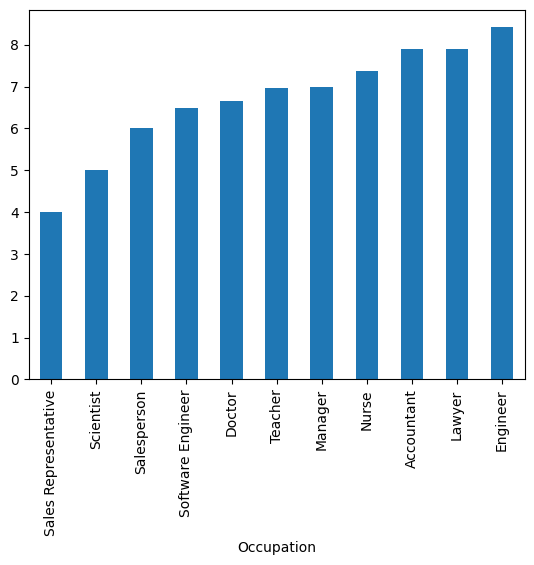

In [36]:
#menampilkan grafik rata-rata kualitas tidur berdasarkan pekerjaan
df.groupby('Occupation')['sleep_quality'].mean().sort_values(ascending=True).plot(kind='bar')

Jika dibandingkan berdasarkan jenis pekerjaan, Sales Representative memiliki kualitas tidur terburuk yaitu ada di skala 4/10. 

## 2. Apakah kualitas tidur mempengaruhi stress level ?


<Axes: xlabel='sleep_quality', ylabel='stress_level'>

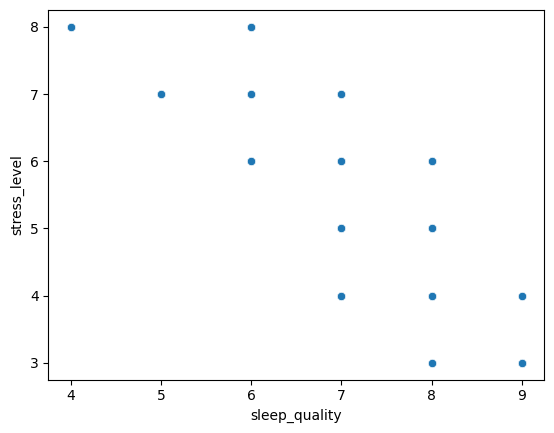

In [22]:
#melihat korelasi antara kualitas tidur dengan tingkat stress dengan grafik scatterplot
sns.color_palette("Paired")
sns.scatterplot(data=df, x='sleep_quality', y='stress_level')

Berdasarkan data, dapat disimpulkan bahwa ada korelasi antara kualitas tidur dengan tingkat stress. Semakin baik kualitas tidurnya, semakin rendah tingkat stressnya. Sebaliknya semakin rendah kualitas tidurnya, semakin tinggi tingkat stressnya.

## 3. Apakah tingkat aktifitas fisik sehari-hari dan langkah harian mempengaruhi kualitas tidur?


<Axes: xlabel='activity_level', ylabel='sleep_quality'>

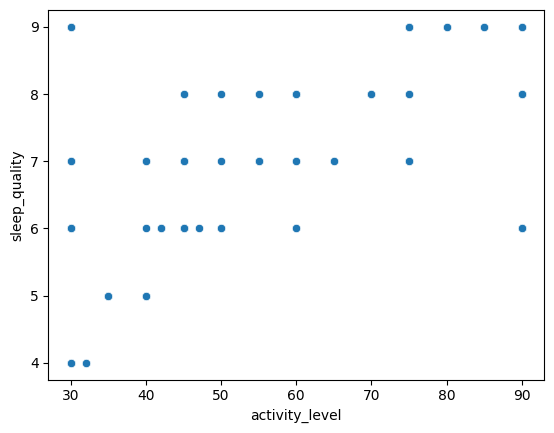

In [23]:
#menampilkan grafik korelasi antara tingkat aktifitas sehari-hari dengan kualitas tidur
sns.color_palette("Paired")
sns.scatterplot(data=df, x='activity_level', y='sleep_quality')

<Axes: xlabel='steps', ylabel='sleep_quality'>

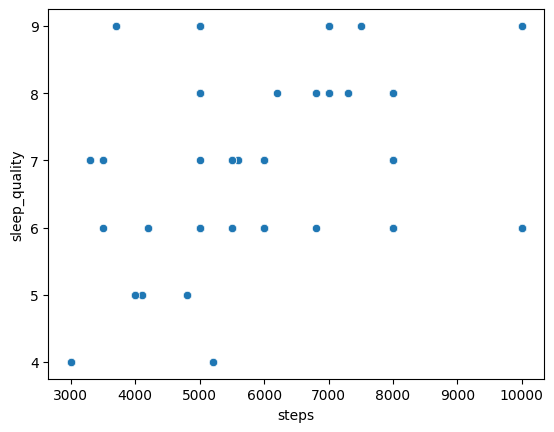

In [24]:
#menampilkan grafik korelasi antara langkah harian dengan kualitas tidur
sns.color_palette("Paired")
sns.scatterplot(data=df, x='steps', y='sleep_quality')

Berdasarkan grafik, tingkat aktifitas sehari-hari dan langkah harian tidak mempengaruhi kualitas tidur secara signifikan.

## 4. Apakah BMI mempengaruhi tekanan darah?


Dari 4 Kategori BMI, saya akan membagi lagi menjadi 2 kategori BMI yaitu BMI Normal dan BMI Over. BMI Normal berisi kategori BMI Normal dan Normal Weight, sedangkan BMI Over berisi kategori BMI Overweight dan BMI Obese

In [25]:
#Filtering BMI Over
bmi_over = df[(df['BMI'] == 'Overweight') | (df['BMI'] == 'Obese')]

<Axes: ylabel='bp_category'>

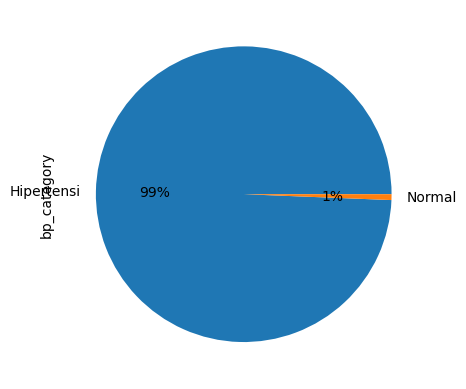

In [26]:
bmi_over['bp_category'].value_counts().plot(kind='pie', autopct='%.0f%%')

Berdasarkan hasil perhitungan, 99% sampel dengan BMI Over memiliki tekanan darah yang tinggi atau Hipertensi.

In [27]:
#Filtering BMI Normal
bmi_normal = df[(df['BMI'] == 'Normal') | (df['BMI'] == 'Normal Weight')]

<Axes: ylabel='bp_category'>

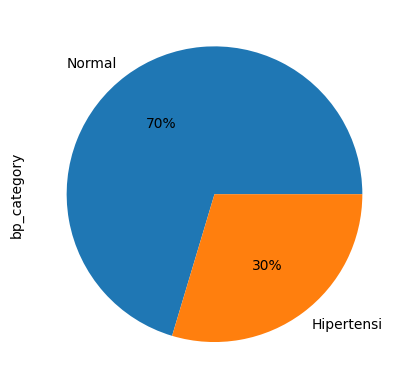

In [28]:
bmi_normal['bp_category'].value_counts().plot(kind='pie', autopct='%.0f%%')

Sedangkan pada sampel dengan BMI Normal, 70% sampel memiliki tekanan darah normal.                
Dari hasil analisis BMI dapat disimpulkan bahwa BMI cukup berpengaruh kepada tekanan darah dikarenakan sampel dengan BMI Over 99% memiliki tekanan darah tinggi, dan pada sampel dengan BMI Normal hanya 30% saja yang memiliki tekanan darah tinggi.

## 5. Bagaimana hubungan tekanan darah dengan stress level?

In [29]:
#melakukan perhitungan rata-rata stress level berdasarkan tekanan darah
df.groupby('bp_category')['stress_level'].mean()

bp_category
Hipertensi    5.570136
Normal        5.117647
Name: stress_level, dtype: float64

Perbedaan tekanan darahm yaitu sampel yang memiliki tekanan darah tinggi dan tekanan darah normal tidak memiliki perbedaan stress level yang signifikan

## 6. Apakah usia mempengaruhi kualitas tidur?


<Axes: xlabel='Age', ylabel='sleep_quality'>

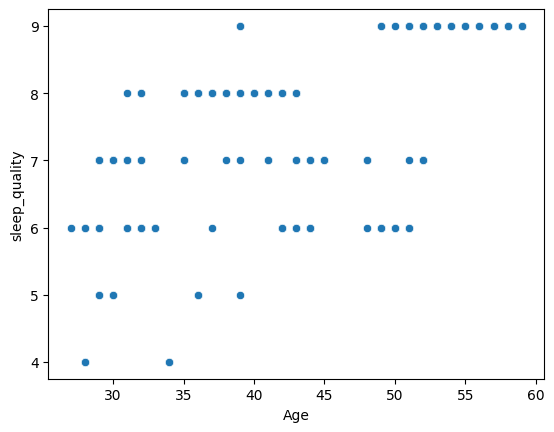

In [30]:
#melihat korelasi usia dengan kualitas tidur 
sns.color_palette("Paired")
sns.scatterplot(data=df, x='Age', y='sleep_quality')

Berdasarkan grafik, dapat dianalisa bahwa usia tidak mempengaruhi kualitas tidur. Dapat dilihat pada sebaran data, dalam satu kelompok usia memiliki kualitas tidur yang bervariasi dari kualitas tidur baik hingga buruk.

## 7. Bagaimana Central Tendencies dari durasi tidur berdasarkan pekerjaan?

In [31]:
#melihat nilai rata-rata, nilai tengah, dan nilai modus darii durasi tidur berdasarkan pekerjaan
df.groupby('Occupation')['sleep_duration'].agg(['mean', 'median', lambda x: x.mode()[0]]) 

,mean,median,<lambda_0>
Occupation,,,
Accountant,7.113514,7.2,7.2
Doctor,6.970423,7.6,6.0
Engineer,7.987302,8.3,8.4
Lawyer,7.410638,7.3,7.2
Manager,6.900000,6.9,6.9
Nurse,7.063014,6.5,6.1
Sales Representative,5.900000,5.9,5.9
Salesperson,6.403125,6.4,6.5
Scientist,6.000000,6.0,5.8


Kelompok pekerjaan yang memiliki rata-rata durasi tidur paling sedikit adalah 'Sales Representative' dengan durasi 5.9 jam per hari. Sedangkan kelompok pekerjaan yang memiliki durasi tidur paling banyak adalah 'Engineer' yaitu 7.98 jam per hari

## 8. Apakah orang dengan sleep disorder dan tanpa sleep disorder memiliki stress level yang sama?

In [32]:
#membuat kelompok/variabel berdasarkan sleep disorder
isdisorder = df[df['sleep_disorder'] == 'None']['stress_level']
nodisorder = df[df['sleep_disorder'] != 'None']['stress_level']

In [33]:
#pengujuian mean dengan metode statistik deskriptif
isd = isdisorder.mean()
print('rata-rata stress level dengan sleep disorder adalah :', isd)

nod = nodisorder.mean()
print('rata-rata stress level tanpa sleep disorder adalah :', nod)

rata-rata stress level dengan sleep disorder adalah : 5.114155251141552
rata-rata stress level tanpa sleep disorder adalah : 5.767741935483871


Bila diuji dengan metode statistik deskriptif, rata-rata stress level antara kelompok tanpa sleep level dan dengan stress level tidak berbeda signifikan. Nilai perbedaan rata-ratanya hanya 0.6

Saya ingin melakukan Hipotesa apakah ada perbedaan signifikan berdasarkan level stress dengan adanya sleep disorder dengan Uji Hipotesis Two Samples Two Tailed

H0 : Mean stress level sampel dengan sleep disorder == sampel tanpa sleep disorder                 
H1 : Mean stress level sampel dengan sleep disorder != sampel tanpa sleep disorder

In [34]:
t_stat, p_val = stats.ttest_ind(isdisorder,nodisorder)
if p_val <= 0.05:
    print('Pvaluenya adalah:', p_val, 'yang berarti H0 ditolak')
else:
    print('Pvaluenya adalah:', p_val, 'yang berarti H0 gagal ditolak')

Pvaluenya adalah: 0.0004135421034039264 yang berarti H0 ditolak


C:\Users\miayu\AppData\Local\Temp\ipykernel_19504\3159250795.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ID, label='Sample with Sleep Disorder',color='blue')


C:\Users\miayu\AppData\Local\Temp\ipykernel_19504\3159250795.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ND, label='Sample Without Sleep Disorder',color='red')


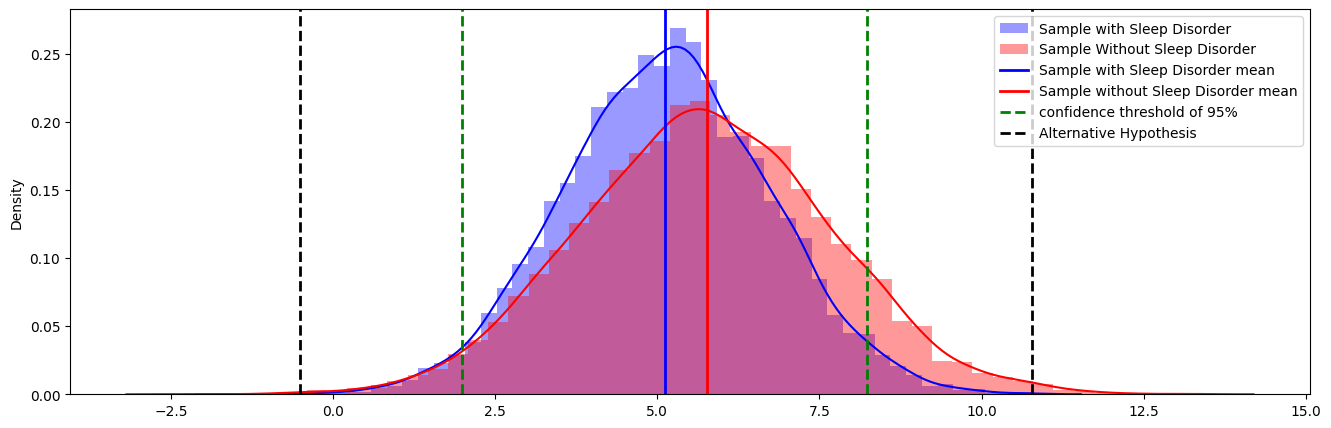

In [35]:
ID = np.random.normal(isdisorder.mean(),isdisorder.std(),10000)
ND = np.random.normal(nodisorder.mean(),nodisorder.std(),10000)

ci = stats.norm.interval(0.95, isdisorder.mean(), isdisorder.std())
plt.figure(figsize=(16,5))
sns.distplot(ID, label='Sample with Sleep Disorder',color='blue')
sns.distplot(ND, label='Sample Without Sleep Disorder',color='red')

plt.axvline(isdisorder.mean(), color='blue', linewidth=2, label='Sample with Sleep Disorder mean')
plt.axvline(nodisorder.mean(), color='red',  linewidth=2, label='Sample without Sleep Disorder mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2)

plt.axvline(ID.mean()+t_stat*ID.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(ID.mean()-t_stat*ID.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()

Pada pengujian mean dengan metode statistik desktriptif, nilai dari kedua kelompok tidak berebeda secara signifikan. Namun berbeda dengan Hasil Uji Hipotesa (statistik inferens) yang menunjukan nilai Pvalue 0.0004135421034039264 dan H0 ditolak, yang berarti bahwa rata-rata stress level sampel yang memiliki sleep disorder berbeda signifikan dengan sampel yang tidak memiliki sleep disorder. Hal ini juga diperkuat dengan grafik dimana nilai pvaluenya berada diluar confidence interval dan letak garis meannya juga berbeda jauh.

Sehingga dapat disimpulkan bahwa terdapat perbedaan yang signifikan antara stress level sampel yang memiliki sleep disorder dengan sampel yang tidak memiliki sleep disorder

# **Pengambilan Kesimpulan**

Berdasarkan beberapa analisa yang telah dilakukan oleh Tim DS, dapat diambil kesimpulan bahwa pekerjaan 'Sales Representative' memiliki kualitas tidur dan durasi tidur yang buruk. Selain itu, terdapat korelasi positif antara kualitas tidur dengan stress level. Orang yang memiliki kualitas tidur buruk maka stress levelnya tinggi. Dalam uji hipotesis, ditemukan bahwa terdapat perbedaan yang signifikan antara stress level sampel yang memiliki sleep disorder dengan sampel yang tidak memiliki sleep disorder.

BMI memiliki pengaruh terhadap tekanan darah, dengan sampel BMI Over 99% memiliki tingkat tekanan darah tinggi. Namun meskipun BMI mempengaruhi tekanan darah, tekanan darah tidak mempengaruhi stress level. Kategori lain seperti usia tidak berpengaruh terhadap kualitas tidur

Adapun saran yang bisa diberikan kepada Tim Marketing adalah, untuk melakukan penjualan dengan metode pendekatan pada masyarakat khususnya yang bekerja sebagai Sales. Karena kualitas tidur mempengaruhi stress level, maka diharapkan obat ini dapat mengurangi stress level para pekerja Sales. Selain kualitas tidur yang berpengaruhi terhadap stress level, durasi tidur juga berpengaruh terhadap penyakit tidur yang diderita. Pekerja yang memiliki durasi tidur yang sedikit, maka semakin tinggi risiko untuk mengalami penyakit tidur. Saran dari Tim DS adalah lakukan iklan dengan menghighlight poin-poin ini. 

Kemudian untuk tim Farmasi, buatlah obat tidur yang bisa digunakan untuk semua umur, karena kualitas tidur yang buruk tidak terbatas pada kelompok umur tertentu, selain itu buatlah obat yang tidak mempengaruhi tekanan darah karena mayoritas sampel memiliki tekanan darah yang tinggi. Apabila membuat obat yang mempengaruhi tekanan darah, dikhawatirkan akan mengganggu tingkat penjualan.    

#### export cleaned dataset

In [37]:
df

,ID,Gender,Age,Occupation,sleep_duration,sleep_quality,activity_level,stress_level,BMI,steps,sleep_disorder,sistolik,diastolik,bp_category
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,4200,None,126,83,Hipertensi
1,2,Male,28,Doctor,6.2,6,60,8,Normal,10000,None,125,80,Normal
2,3,Male,28,Doctor,6.2,6,60,8,Normal,10000,None,125,80,Normal
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,3000,Sleep Apnea,140,90,Hipertensi
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,3000,Sleep Apnea,140,90,Hipertensi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,7000,Sleep Apnea,140,95,Hipertensi
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,7000,Sleep Apnea,140,95,Hipertensi
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,7000,Sleep Apnea,140,95,Hipertensi
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,7000,Sleep Apnea,140,95,Hipertensi


In [40]:
df.to_csv('sleep_and_lifestyle_cleaned.csv', index=False)